In [614]:
# convert in python script by: jupyter nbconvert --to script Visu_output.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os


print_interactive = True
#variables_to_display="all"
variables_to_display="all"

# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            
os.chdir('../output')
#print(glob.glob('x*outer.out'))
filenames_outer = sorted(glob.glob('x*outer.out'))
filenames_inner = sorted(glob.glob('x*inner.out'))
filenames_inner_minimal = sorted(glob.glob('x*inner_minimal.out'))
filenames_outer_minimal = sorted(glob.glob('x*outer_minimal.out'))
filenames_inner_robust = sorted(glob.glob('x*inner_robust.out'))
filenames_outer_robust = sorted(glob.glob('x*outer_robust.out'))

/Users/sylvie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-b645f80a-084a-4707-b659-bcf6f8705da6.json


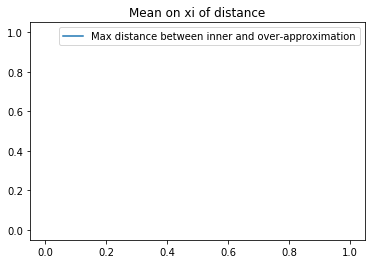

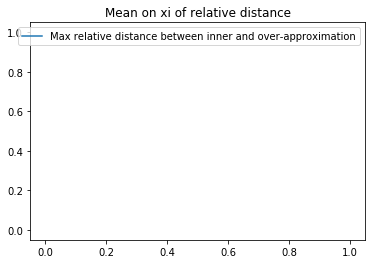

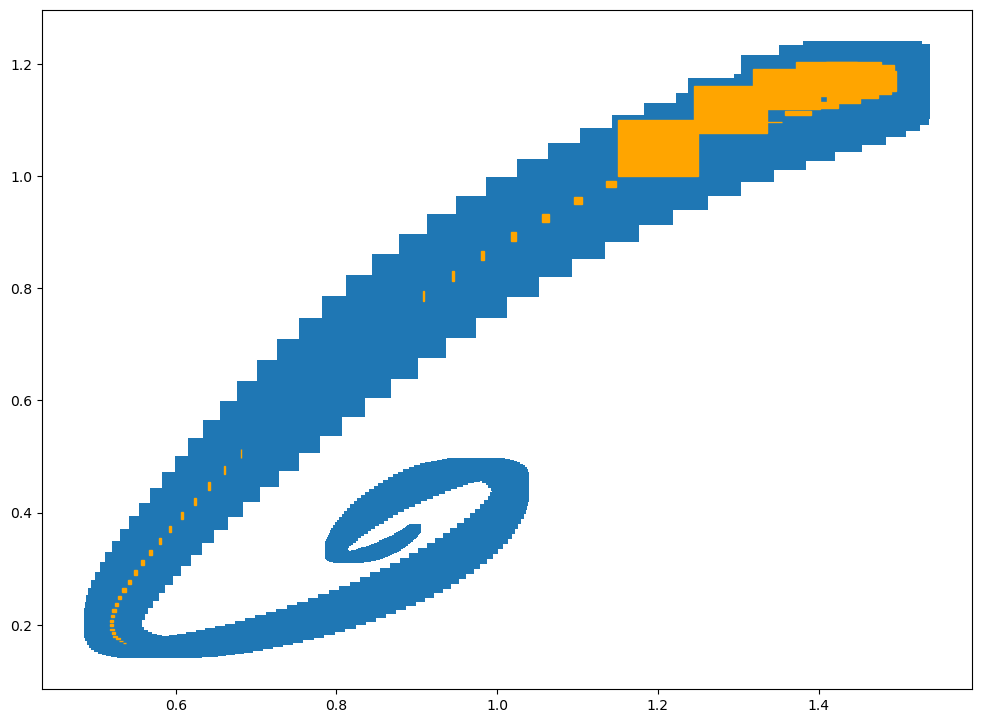

In [615]:
width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle

def print_xy(varx,vary):
    # print maximal outer and inner approximations for each component separately
    fx_inner = varx + 'inner_joint.out'
    fy_inner = vary + 'inner_joint.out'
    fx_outer = varx + 'outer.out'
    fy_outer = vary + 'outer.out'
    with open(fx_outer, 'r') as x_outer, open(fx_inner, 'r') as x_inner, open(fy_outer, 'r') as y_outer, open(fy_inner, 'r') as y_inner:
        linesx_outer = x_outer.readlines()
        tx_outer = [float(line.split()[0]) for line in linesx_outer]
        xmin_outer = [float(line.split()[1]) for line in linesx_outer]
        xmax_outer = [float(line.split()[2]) for line in linesx_outer]
        linesx_inner = x_inner.readlines()     
        tx_inner = [float(line.split()[0]) for line in linesx_inner]
        xmin_inner = [float(line.split()[1]) for line in linesx_inner]
        xmax_inner = [float(line.split()[2]) for line in linesx_inner]
        linesy_outer = y_outer.readlines()
        ty_outer = [float(line.split()[0]) for line in linesy_outer]
        ymin_outer = [float(line.split()[1]) for line in linesy_outer]
        ymax_outer = [float(line.split()[2]) for line in linesy_outer]
        linesy_inner = y_inner.readlines()     
        ty_inner = [float(line.split()[0]) for line in linesy_inner]
        ymin_inner = [float(line.split()[1]) for line in linesy_inner]
        ymax_inner = [float(line.split()[2]) for line in linesy_inner]
        
        for xo1,xo2,xi1,xi2,yo1,yo2,yi1,yi2 in zip(xmin_outer,xmax_outer,xmin_inner,xmax_inner,ymin_outer,ymax_outer,ymin_inner,ymax_inner):
            car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1)
            ax.add_patch(car_fig)
        for xo1,xo2,xi1,xi2,yo1,yo2,yi1,yi2 in zip(xmin_outer,xmax_outer,xmin_inner,xmax_inner,ymin_outer,ymax_outer,ymin_inner,ymax_inner):
            car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='orange')
            ax.add_patch(car_fig2)
    ax.autoscale()
    f_output="joint_" + varx + vary
    plt.savefig(f_output)
    if (print_interactive):
        plt.show() 
        
print_xy("x1","x2")

In [616]:
# if print_robust = True: print robust approx
# if print_minimal = True: print minimal approx
# print maximal approx in any case
# if only_one_graph = True, print all components on same graph
# if subplots = True, print all components on one figure using subplots
# if print_interactive = False, only print in files, otherwise do both
def my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display):
    
    nbsubplots = len(filenames_outer)
    nbcols = min(3,nbsubplots)
    nbrows = nbsubplots // nbcols
    nbrows += nbsubplots % nbcols
    position=range(1,nbsubplots+1)
    
    # larger figure if everything one one graph
    if (only_one_graph):
        width_in_inches = 10
        height_in_inches = 8
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    elif (subplots):
        width_in_inches = 12
        height_in_inches = 4*nbrows
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch) 
    else:
        fig = plt.figure()
    
    if (print_robust and print_minimal):
        extension = '_rob_min_max.png'
    elif (print_minimal):
        extension = '_min_max.png'
    elif (print_robust):
        extension = '_rob_max.png'
    else:
        extension = '_max.png'
    
    # print maximal outer and inner approximations for each component separately
    for f_outer,f_inner,k in zip(filenames_outer, filenames_inner,range(nbsubplots)):
        variable = f_outer.rsplit( "outer", 1 )[ 0 ]  # get variable name out of file names
        variable_nb = '-' + variable.split( "x", 1 )[1] + '-'
        # print only if variable is in list of variables to display
        if re.match(variable_nb,variables_to_display) or re.match("all",variables_to_display):  
            if (subplots):
                ax = fig.add_subplot(nbrows,nbcols,position[k])
            with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                lines_outer = x_outer.readlines()
                t_outer = [float(line.split()[0]) for line in lines_outer]
                xmin_outer = [float(line.split()[1]) for line in lines_outer]
                xmax_outer = [float(line.split()[2]) for line in lines_outer]
                lines_inner = x_inner.readlines()
                t_inner = [float(line.split()[0]) for line in lines_inner]
                xmin_inner = [float(line.split()[1]) for line in lines_inner]
                xmax_inner = [float(line.split()[2]) for line in lines_inner]
            if (subplots):
                ax.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
                ax.fill_between(t_outer,xmin_outer,xmax_outer, label='maximal outer approx')
                ax.plot(t_inner ,xmin_inner, t_inner, xmax_inner,  color='red')
                ax.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                ax.title.set_text(variable)
            else:
                plt.plot(t_outer ,xmin_outer, t_outer, xmax_outer, color='black')
             #   plt.fill_between(t_outer,xmin_outer,xmax_outer, label='maximal outer approx')
             #   plt.plot(t_inner ,xmin_inner, t_inner, xmax_inner,  color='red')
                plt.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')

            if ((len(filenames_inner_minimal) != 0) and print_minimal):
                f_outer = variable + 'outer_minimal.out'
                f_inner = variable + 'inner_minimal.out'
                with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                    lines_outer = x_outer.readlines()
                    t_outer_min = [float(line.split()[0]) for line in lines_outer]
                    xmin_outer_min = [float(line.split()[1]) for line in lines_outer]
                    xmax_outer_min = [float(line.split()[2]) for line in lines_outer]
                    lines_inner = x_inner.readlines()
                    t_inner_min = [float(line.split()[0]) for line in lines_inner]
                    xmin_inner_min = [float(line.split()[1]) for line in lines_inner]
                    xmax_inner_min = [float(line.split()[2]) for line in lines_inner]
                if (subplots):
                    ax.plot(t_outer_min ,xmin_outer_min, t_outer_min, xmax_outer_min, color='black')
                    ax.fill_between(t_outer_min,xmin_outer_min,xmax_outer_min, label='minimal outer approx')
                    ax.plot(t_inner_min ,xmin_inner_min, t_inner_min, xmax_inner_min,  color='red')
                    ax.fill_between(t_inner_min,xmin_inner_min,xmax_inner_min, label='minimal inner approx')
                else:
                    plt.plot(t_outer_min ,xmin_outer_min, t_outer_min, xmax_outer_min, color='black')
                    plt.fill_between(t_outer_min,xmin_outer_min,xmax_outer_min, label='minimal outer approx')
                    plt.plot(t_inner_min ,xmin_inner_min, t_inner_min, xmax_inner_min,  color='red')
                    plt.fill_between(t_inner_min,xmin_inner_min,xmax_inner_min, label='minimal inner approx')

            if ((len(filenames_inner_robust) != 0) and print_robust):
                f_outer = variable + 'outer_robust.out'
                f_inner = variable + 'inner_robust.out'
                with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                    lines_outer = x_outer.readlines()
                    t_outer_min = [float(line.split()[0]) for line in lines_outer]
                    xmin_outer_min = [float(line.split()[1]) for line in lines_outer]
                    xmax_outer_min = [float(line.split()[2]) for line in lines_outer]
                    lines_inner = x_inner.readlines()
                    t_inner_min = [float(line.split()[0]) for line in lines_inner]
                    xmin_inner_min = [float(line.split()[1]) for line in lines_inner]
                    xmax_inner_min = [float(line.split()[2]) for line in lines_inner]
                if (subplots):
                    plt.plot(t_outer_min ,xmin_outer_min, t_outer_min, xmax_outer_min, color='black')
                    plt.fill_between(t_outer_min,xmin_outer_min,xmax_outer_min, label='robust outer approx')
                    plt.plot(t_inner_min ,xmin_inner_min, t_inner_min, xmax_inner_min,  color='red')
                    plt.fill_between(t_inner_min,xmin_inner_min,xmax_inner_min, label='robust inner approx')
                else:
                    plt.plot(t_outer_min ,xmin_outer_min, t_outer_min, xmax_outer_min, color='black')
                    plt.fill_between(t_outer_min,xmin_outer_min,xmax_outer_min, label='robust outer approx')
                    plt.plot(t_inner_min ,xmin_inner_min, t_inner_min, xmax_inner_min,  color='red')
                    plt.fill_between(t_inner_min,xmin_inner_min,xmax_inner_min, label='robust inner approx')

            if ((not only_one_graph) and (not subplots)):
                plt.legend() # add the legend specified by the above labels
                plt.title(variable)
                f_output = variable + extension
                plt.savefig(f_output) # save to file
                if (print_interactive):
                    plt.show() # print 
    if (only_one_graph or subplots):
        if (only_one_graph):
            plt.title("All components")
            f_output = 'xi' + extension
        if (subplots):
            f_output = 'xi_subplots' + extension
        plt.savefig(f_output)    
        if (print_interactive):
            plt.show() # print all components on same graph

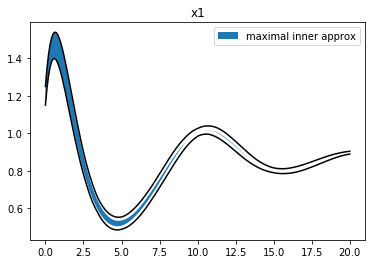

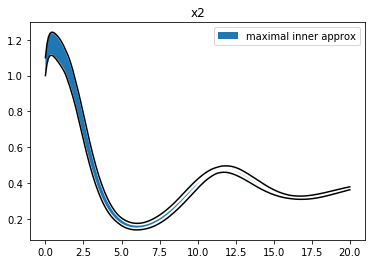

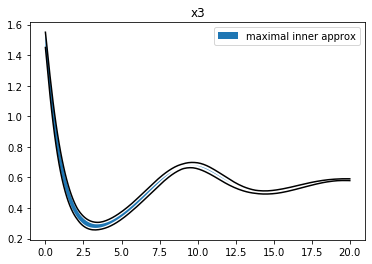

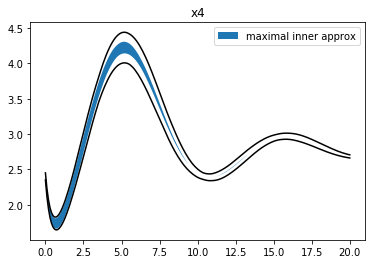

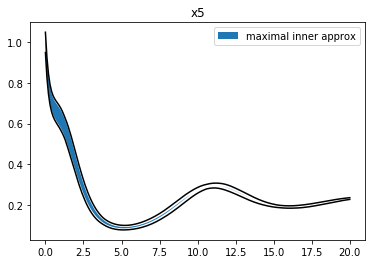

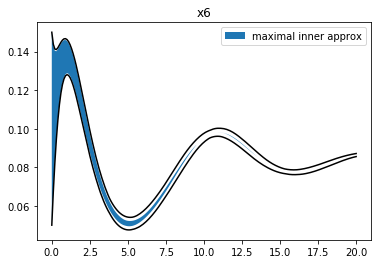

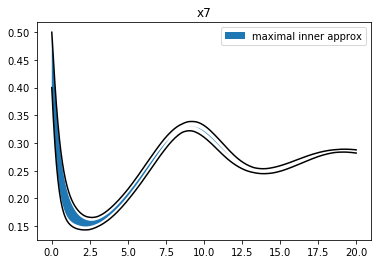

In [617]:
print_robust = False
print_minimal = True
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

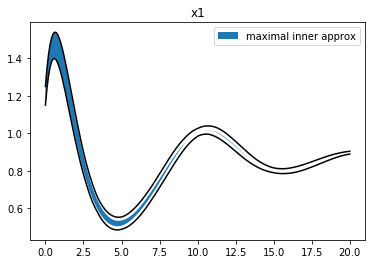

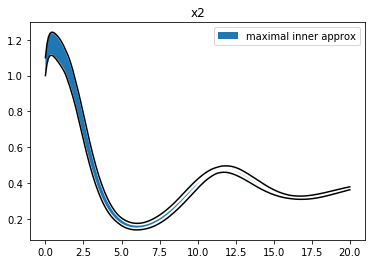

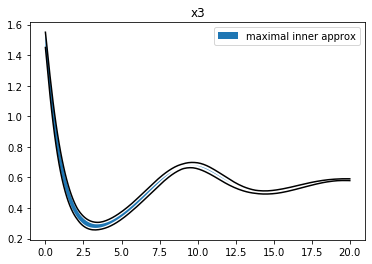

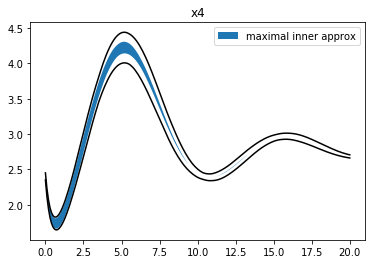

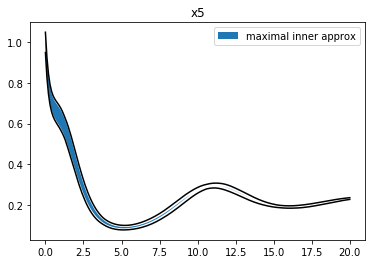

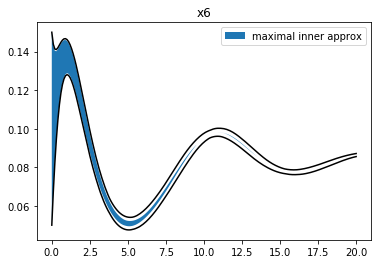

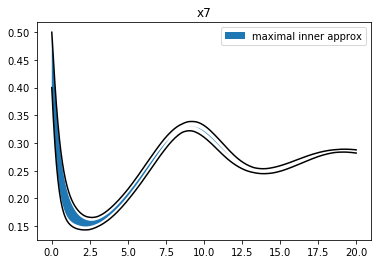

In [618]:
print_robust = False
print_minimal = False
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

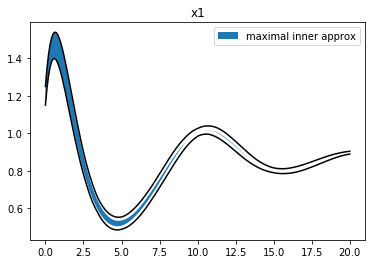

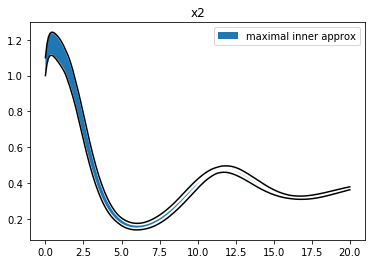

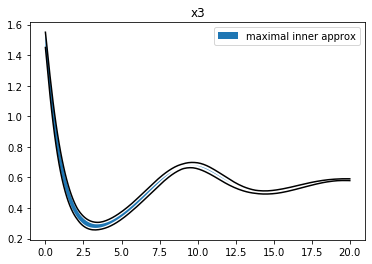

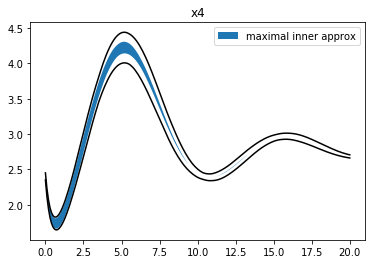

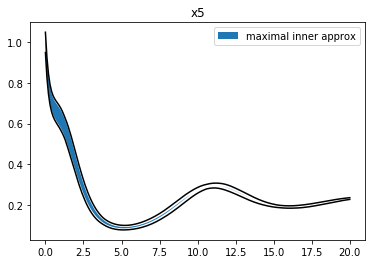

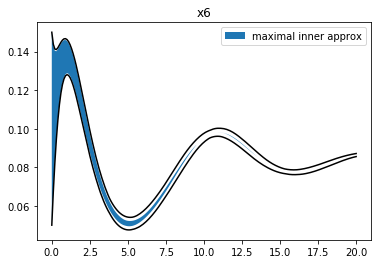

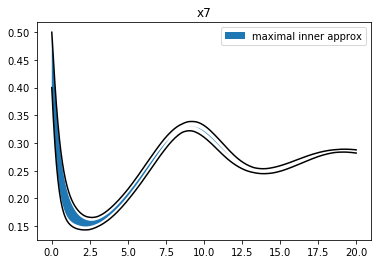

In [619]:
print_robust = True
print_minimal = False
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

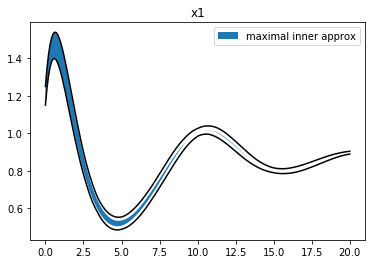

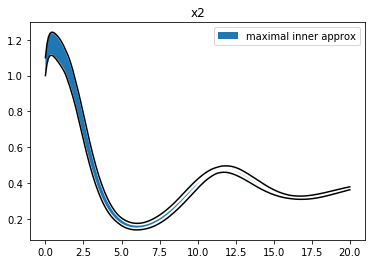

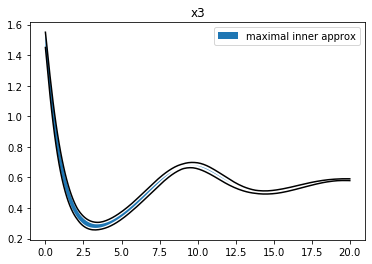

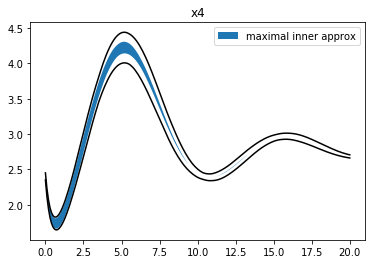

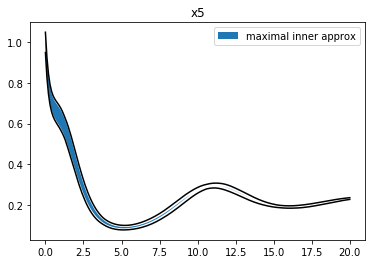

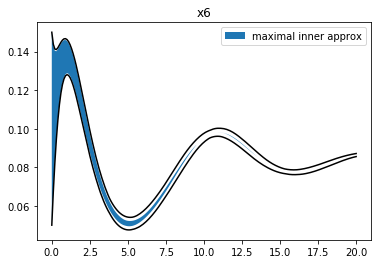

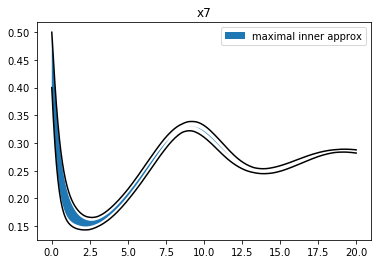

In [620]:
print_robust = True
print_minimal = True
only_one_graph = False
subplots = False

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

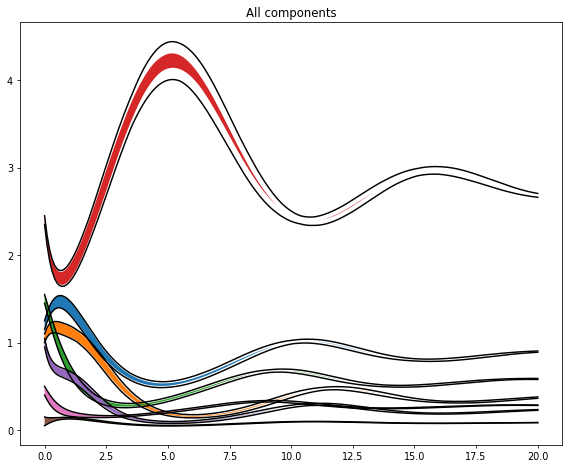

In [621]:
print_robust = False
print_minimal = False
only_one_graph = True
subplots = False
my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

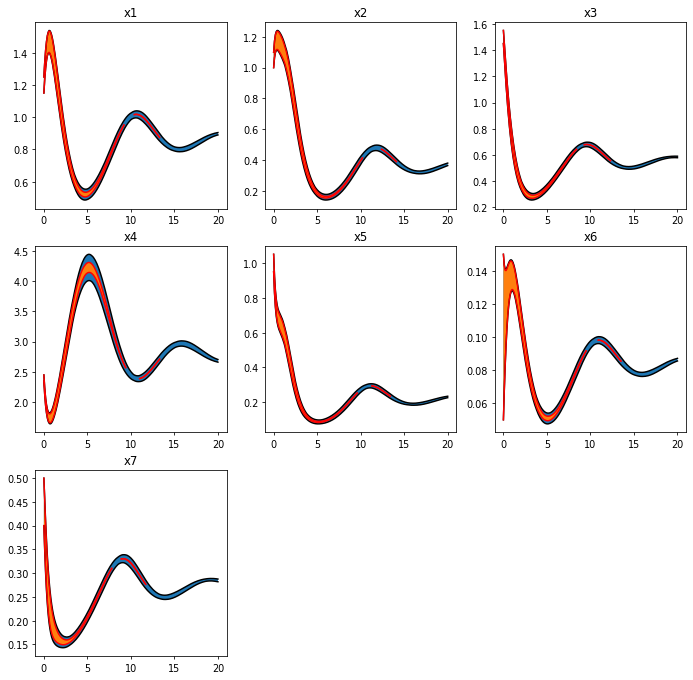

In [622]:
print_robust = False
print_minimal = True
only_one_graph = False
subplots = True
my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)

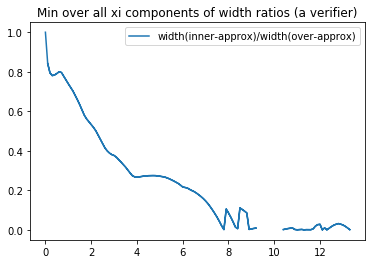

In [623]:
# plotting the width ratio: min over xi of the ratios ? A verifie
fig = plt.figure()
with open("width_ratio.out", 'r') as width_ratio:
    lines = width_ratio.readlines()
    t = [float(line.split()[0]) for line in lines]
    ratio = [float(line.split()[1]) for line in lines]
plt.plot(t , ratio, label='width(inner-approx)/width(over-approx)')
plt.legend() # add the legend specified by the above labels
plt.title("Min over all xi components of width ratios (a verifier)")
plt.savefig("width_ratio.png") # save to file
if (print_interactive):
    plt.show() # print

In [624]:
print_interactive = False

# mean on xi of error between outer-approx and analytical solution if any
fig = plt.figure()
with open("meanerror_diff.out", 'r') as meanerror_diff, open("meanerror_inner.out", 'r') as meanerror_inner, open("meanerror_outer.out", 'r') as meanerror_outer :
    lines1 = meanerror_diff.readlines()
    lines2 = meanerror_inner.readlines()
    lines3 = meanerror_outer.readlines()
    t1 = [float(line.split()[0]) for line in lines1]
    error1 = [float(line.split()[1]) for line in lines1]
    t2 = [float(line.split()[0]) for line in lines2]
    error2 = [float(line.split()[1]) for line in lines2]
    t3 = [float(line.split()[0]) for line in lines3]
    error3 = [float(line.split()[1]) for line in lines3]
plt.plot(t1 , error1, label='Max distance between inner and over-approximation')
if (os.stat("meanerror_inner.out").st_size != 0):
    plt.plot(t2, error2, label='Distance of inner approximation to exact solution')
if (os.stat("meanerror_outer.out").st_size != 0):    
    plt.plot(t3, error3, label='Distance of outer approximation to exact solution')
plt.legend() # add the legend specified by the above labels
plt.title("Mean on xi of distance")
plt.savefig("meanerror.png") # save to file
if (print_interactive):
    plt.show() # print

In [625]:
# mean on xi of error between outer-approx and analytical solution if any
fig = plt.figure()
with open("relmeanerror_diff.out", 'r') as meanerror_diff, open("relmeanerror_inner.out", 'r') as meanerror_inner, open("relmeanerror_outer.out", 'r') as meanerror_outer :
    lines1 = meanerror_diff.readlines()
    lines2 = meanerror_inner.readlines()
    lines3 = meanerror_outer.readlines()
    t1 = [float(line.split()[0]) for line in lines1]
    error1 = [float(line.split()[1]) for line in lines1]
    t2 = [float(line.split()[0]) for line in lines2]
    error2 = [float(line.split()[1]) for line in lines2]
    t3 = [float(line.split()[0]) for line in lines3]
    error3 = [float(line.split()[1]) for line in lines3]
plt.plot(t1 , error1, label='Max relative distance between inner and over-approximation')
if (os.stat("meanerror_inner.out").st_size != 0):
    plt.plot(t2, error2, label='Relative distance of inner approximation to exact solution')
if (os.stat("meanerror_outer.out").st_size != 0):    
    plt.plot(t3, error3, label='Relative distance of outer approximation to exact solution')
plt.legend() # add the legend specified by the above labels
plt.title("Mean on xi of relative distance")
plt.savefig("meanrelativeerror.png") # save to file
if (print_interactive):
    plt.show() # print